In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_S1_revised_180420_Dpar.csv', header=0)
data_table2=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_2_revised_180420.csv', header=0)


In [5]:
#data.SampleID[data.Dpar_um>=2]

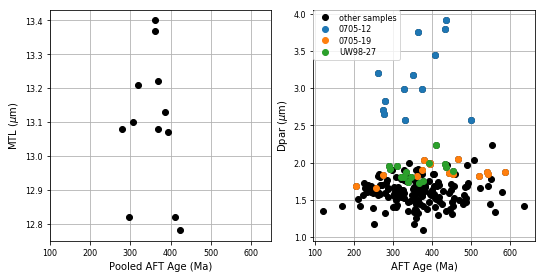

In [6]:
ms=5
lfs=8
lbp=0
lls=0.3
ls=8

largeDpar=['0705-12', '0705-19','UW98-27']
fig= plt.subplots(2,1, figsize=(3.7*2, 3.7))# This size is in inches

plt.subplot(1, 2, 1)
plt.plot(data_table2.Pooled_age_Ma, data_table2.Mean_track_length_um,  'o', c='k', label='other samples')
plt.xlim(100,650)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=ls)
plt.xlabel('Pooled AFT Age (Ma)')
plt.ylabel('MTL ($\mu$m)')


plt.subplot(1, 2, 2)
plt.plot(data.Age_Ma,data.Dpar_um,  'o', c='k', label='other samples')
for i in largeDpar:
    plt.plot( data.Age_Ma[data.SampleID==i], data.Dpar_um[data.SampleID==i],'o', label=i)

plt.tick_params(axis='both', which='major', labelsize=ls)
plt.grid()
plt.xlabel('AFT Age (Ma)')
plt.ylabel('Dpar ($\mu$m)')
plt.tight_layout(pad=0.10)
plt.legend(borderaxespad=lbp, fontsize=lfs, labelspacing=lls, loc='upper left')
plt.savefig("./Fig_3MTL&Dpar_vs_AFT_age_180420.jpg", borderaxespad=lbp, fontsize=lfs, labelspacing=lls, dpi=300)

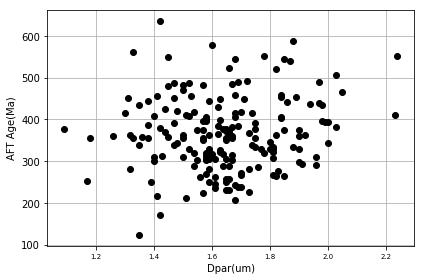

In [90]:
fig= plt.plot( figsize=(3.7, 3,7))# This size is in inches

plt.plot(data.Dpar_um[data.SampleID!='0705-12'], data.Age_Ma[data.SampleID!='0705-12'], 'o', c='k')
plt.xticks( fontsize=7)
plt.grid()
plt.ylabel('AFT Age(Ma)')
plt.xlabel('Dpar(um)')
plt.tight_layout()
plt.savefig("./AFT_age_vs_Dpar_No0705-12.pdf")

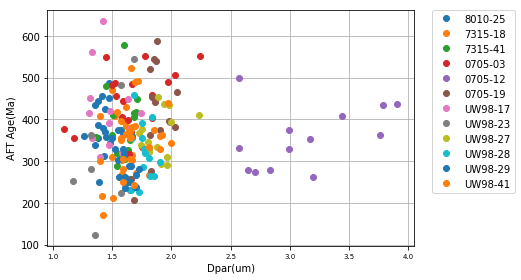

In [92]:
fig= plt.plot( figsize=(3.7, 3,7))# This size is in inches
samples=data.SampleID.unique()

for i in samples:
    plt.plot(data.Dpar_um[data.SampleID==i], data.Age_Ma[data.SampleID==i], 'o', label=i)

plt.xticks( fontsize=7)
plt.grid()
plt.ylabel('AFT Age(Ma)')
plt.xlabel('Dpar(um)')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig("./AFT_age_vs_Dpar_bysample.pdf")

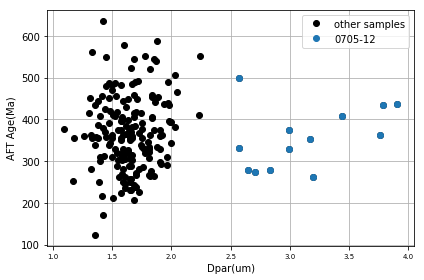

In [93]:
fig= plt.plot( figsize=(3.7, 3,7))# This size is in inches
plt.plot(data.Dpar_um, data.Age_Ma, 'o', c='k', label='other samples')

largeDpar=['0705-12']
for i in largeDpar:
    plt.plot(data.Dpar_um[data.SampleID==i], data.Age_Ma[data.SampleID==i], 'o', label=i)

plt.xticks( fontsize=7)
plt.grid()
plt.ylabel('AFT Age(Ma)')
plt.xlabel('Dpar(um)')
plt.tight_layout()
plt.legend()